In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import urllib.request
import zipfile
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Download and extract the dataset
def download_dataset():
    # URL for the SMS Spam Collection dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
    file_name = "smsspamcollection.zip"
    
    # Download the file
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, file_name)
    
    # Extract the zip file
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall()
    print("Dataset downloaded and extracted successfully!")
    
    # Read the dataset
    df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'text'])
    return df

# Download and load the dataset
try:
    df = download_dataset()
except Exception as e:
    print(f"Error downloading dataset: {e}")
    print("Using local file if available...")
    try:
        df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'text'])
    except:
        print("Could not load dataset. Please check your internet connection or download it manually from:")
        print("https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip")
        exit()

# Explore the dataset
print("\nDataset preview:")
print(df.head())
print("\nLabel distribution:")
print(df['label'].value_counts())



Dataset downloaded and extracted successfully!

Dataset preview:
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


In [3]:
# Preprocess the data
# Convert labels to binary (0 for ham, 1 for spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Convert text to lowercase and remove special characters
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# Split the data into features (X) and labels (y)
X = df['text']
y = df['label']



In [4]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for text processing and modeling
# This does: 
# 1. Count word occurrences (CountVectorizer)
# 2. Transform counts to weighted TF-IDF scores (TfidfTransformer)
# 3. Train a Naive Bayes classifier (MultinomialNB)
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english', max_features=5000)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])



In [5]:
# Train the model
print("\nTraining model...")
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)




Training model...

Model Accuracy: 0.9785

Confusion Matrix:
[[966   0]
 [ 24 125]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



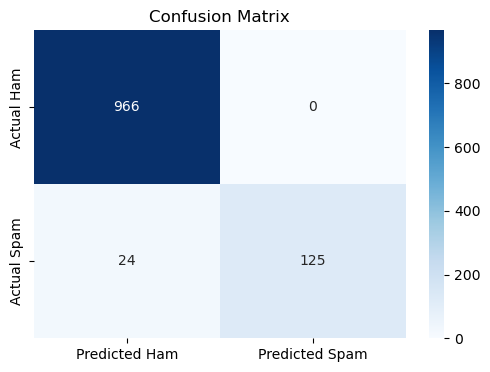

In [6]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Ham', 'Predicted Spam'], 
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title('Confusion Matrix')
plt.show()



In [7]:
# Example predictions
test_messages = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)",
    "Nah I don't think he goes to usf, he lives around here though",
    "URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18",
    "I'll call you later",
    "Congratulations! You've been selected for a free iPhone! Call now to claim your prize."
]

print("\nExample predictions:")
for message in test_messages:
    prediction = pipeline.predict([message])[0]
    proba = pipeline.predict_proba([message])[0]
    print(f"\nMessage: {message}")
    print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}")
    print(f"Confidence: {proba[prediction]*100:.2f}%")
    print(f"Probabilities: [Ham: {proba[0]*100:.2f}%, Spam: {proba[1]*100:.2f}%]")


Example predictions:

Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)
Prediction: Spam
Confidence: 96.83%
Probabilities: [Ham: 3.17%, Spam: 96.83%]

Message: Nah I don't think he goes to usf, he lives around here though
Prediction: Ham
Confidence: 98.74%
Probabilities: [Ham: 98.74%, Spam: 1.26%]

Message: URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Prediction: Spam
Confidence: 98.70%
Probabilities: [Ham: 1.30%, Spam: 98.70%]

Message: I'll call you later
Prediction: Ham
Confidence: 98.11%
Probabilities: [Ham: 98.11%, Spam: 1.89%]

Message: Congratulations! You've been selected for a free iPhone! Call now to claim your prize.
Prediction: Spam
Confidence: 93.54%
Probabilities: [Ham: 6.46%, Spam: 93.54%]
